## Hotel booking demand, 酒店预订需求

## 1.数据导入及查看

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Documents\DataMiningHW3\hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
[*zip(df.columns,df.dtypes,df.isnull().sum())]

[('hotel', dtype('O'), 0),
 ('is_canceled', dtype('int64'), 0),
 ('lead_time', dtype('int64'), 0),
 ('arrival_date_year', dtype('int64'), 0),
 ('arrival_date_month', dtype('O'), 0),
 ('arrival_date_week_number', dtype('int64'), 0),
 ('arrival_date_day_of_month', dtype('int64'), 0),
 ('stays_in_weekend_nights', dtype('int64'), 0),
 ('stays_in_week_nights', dtype('int64'), 0),
 ('adults', dtype('int64'), 0),
 ('children', dtype('float64'), 4),
 ('babies', dtype('int64'), 0),
 ('meal', dtype('O'), 0),
 ('country', dtype('O'), 488),
 ('market_segment', dtype('O'), 0),
 ('distribution_channel', dtype('O'), 0),
 ('is_repeated_guest', dtype('int64'), 0),
 ('previous_cancellations', dtype('int64'), 0),
 ('previous_bookings_not_canceled', dtype('int64'), 0),
 ('reserved_room_type', dtype('O'), 0),
 ('assigned_room_type', dtype('O'), 0),
 ('booking_changes', dtype('int64'), 0),
 ('deposit_type', dtype('O'), 0),
 ('agent', dtype('float64'), 16340),
 ('company', dtype('float64'), 112593),
 ('days_

In [5]:
df.isnull().sum()
#children 用0填充
#country缺失行删去
#company删去整个列
#agent用众数填充

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## 2.数据预处理

In [6]:
#company特征缺失过多，删除
df.drop(['company'],axis=1,inplace=True)

#children缺失的用0填充
df['children'].replace(np.nan,0,inplace=True)

#删去缺失country的行
df.dropna(subset=['country'],inplace=True)

#agent缺失的认为是没有用agent，即自己预订，用-1填充
agent=df.loc[:,"agent"].values.reshape(-1,1)
df.loc[:,"agent"]=SimpleImputer(strategy="constant",fill_value=-1).fit_transform(agent)

In [7]:
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [12]:
#用处不大的特征直接删去
df.drop(["reservation_status","reservation_status_date"],axis=1,inplace=True)

## 2.1非数值型数据进行编码

In [13]:
#需要编码的特征
ordin = df.loc[:,["arrival_date_month","arrival_date_year"
        ,"meal","country","market_segment","distribution_channel"
        ,"reserved_room_type","assigned_room_type"
        ,"deposit_type","customer_type"]]
OrdinalEncoder().fit(ordin).categories_


[array(['April', 'August', 'December', 'February', 'January', 'July',
        'June', 'March', 'May', 'November', 'October', 'September'],
       dtype=object),
 array([2015, 2016, 2017], dtype=int64),
 array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object),
 array(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
        'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
        'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB',
        'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL',
        'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI',
        'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH',
        'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA',
        'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV',
        'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
        'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR',
        'KNA', 'KOR', 'KWT',

In [14]:
#注意这里不能用ord=OrdinalEncoder().fit_transform(ordin)
#因为ord是一个df.loc[]的副本，而不是指向df.loc[]的指针
#所以给ord赋值并不会改变df.loc[]

In [15]:
df.loc[:,["arrival_date_month","arrival_date_year"
        ,"meal","country","market_segment","distribution_channel"
        ,"reserved_room_type","assigned_room_type"
        ,"deposit_type","customer_type"]] = OrdinalEncoder().fit_transform(ordin)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0.0,5.0,27,1,0,0,2,...,2.0,2.0,3,0.0,-1.0,0,2.0,0.0,0,0
1,Resort Hotel,0,737,0.0,5.0,27,1,0,0,2,...,2.0,2.0,4,0.0,-1.0,0,2.0,0.0,0,0
2,Resort Hotel,0,7,0.0,5.0,27,1,0,1,1,...,0.0,2.0,0,0.0,-1.0,0,2.0,75.0,0,0
3,Resort Hotel,0,13,0.0,5.0,27,1,0,1,1,...,0.0,0.0,0,0.0,304.0,0,2.0,75.0,0,0
4,Resort Hotel,0,14,0.0,5.0,27,1,0,2,2,...,0.0,0.0,0,0.0,240.0,0,2.0,98.0,0,1


In [16]:
#对关键的'hotel'进行独热编码
hot = df.loc[:,'hotel'].values.reshape(-1,1)
res = OneHotEncoder(categories='auto').fit(hot)
res.get_feature_names()

array(['x0_City Hotel', 'x0_Resort Hotel'], dtype=object)

In [17]:
res=res.transform(hot).toarray()

In [18]:
hotdf=pd.concat([df,pd.DataFrame(res)],axis=1)#列连接
hotdf.drop(['hotel'],axis=1,inplace=True)
hotdf = hotdf.rename(columns={0:"is_City_Hotel",1:"is_Resort_Hotel"})

In [19]:
hotdf.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_City_Hotel,is_Resort_Hotel
0,0.0,342.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,...,3.0,0.0,-1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
1,0.0,737.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,...,4.0,0.0,-1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
2,0.0,7.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,-1.0,0.0,2.0,75.0,0.0,0.0,0.0,1.0
3,0.0,13.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,304.0,0.0,2.0,75.0,0.0,0.0,0.0,1.0
4,0.0,14.0,0.0,5.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,240.0,0.0,2.0,98.0,0.0,1.0,0.0,1.0


## 2.3归一化

In [20]:
stddf = StandardScaler().fit_transform(hotdf.loc[:,["lead_time","adr"]])
stddf = pd.concat([hotdf,pd.DataFrame(stddf)],axis=1)
stddf = stddf.drop(['lead_time','adr'],axis=1)
stddf = stddf.rename(columns={0:"lead_time",1:"adr"})
stddf.head()

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,is_City_Hotel,is_Resort_Hotel,lead_time,adr
0,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,-1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.223443,-2.020346
1,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,-1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.918392,-2.020346
2,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,-1.0,0.0,2.0,0.0,0.0,0.0,1.0,-0.910249,-0.534809
3,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,304.0,0.0,2.0,0.0,0.0,0.0,1.0,-0.854123,-0.534809
4,0.0,0.0,5.0,27.0,1.0,0.0,2.0,2.0,0.0,0.0,...,0.0,240.0,0.0,2.0,0.0,1.0,0.0,1.0,-0.844769,-0.079245


In [21]:
stddf.shape

(119390, 30)

In [22]:
stddf.dtypes
#注意这里不能用hotdf.rename(columns={0:"is_City_Hotel",1:"is_Resort_Hotel"})
#否则原hotdf不会改变

is_canceled                       float64
arrival_date_year                 float64
arrival_date_month                float64
arrival_date_week_number          float64
arrival_date_day_of_month         float64
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                            float64
children                          float64
babies                            float64
meal                              float64
country                           float64
market_segment                    float64
distribution_channel              float64
is_repeated_guest                 float64
previous_cancellations            float64
previous_bookings_not_canceled    float64
reserved_room_type                float64
assigned_room_type                float64
booking_changes                   float64
deposit_type                      float64
agent                             float64
days_in_waiting_list              float64
customer_type                     

## 2.4进行方差筛选

In [23]:
#获取列index，以防筛选后不知道删去那些特征
column_index = pd.DataFrame(np.arange(0,(stddf.shape[1])).reshape(1,-1))
column_index.columns=stddf.columns
column_index

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,is_City_Hotel,is_Resort_Hotel,lead_time,adr
0,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29


In [24]:
#indexdf的第一行为列索引
indexdf = pd.concat([column_index,stddf])
indexdf = indexdf.dropna()
indexdf.head()

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,is_City_Hotel,is_Resort_Hotel,lead_time,adr
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.000000,29.000000
0,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,-1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.223443,-2.020346
1,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,-1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.918392,-2.020346
2,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,-1.0,0.0,2.0,0.0,0.0,0.0,1.0,-0.910249,-0.534809
3,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,304.0,0.0,2.0,0.0,0.0,0.0,1.0,-0.854123,-0.534809


In [25]:
#进行方差筛选
vardf = VarianceThreshold(0.2*np.median(indexdf.var().values)).fit_transform(indexdf)
vardf.shape

(118415, 25)

In [26]:
vardf = pd.DataFrame(vardf)
vardf.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,10.0,11.0,...,18.0,19.0,21.0,22.0,23.0,25.0,26.0,27.0,28.000000,29.000000
1,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,2.0,3.0,-1.0,0.0,2.0,0.0,0.0,1.0,2.223443,-2.020346
2,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,2.0,4.0,-1.0,0.0,2.0,0.0,0.0,1.0,5.918392,-2.020346
3,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,2.0,0.0,-1.0,0.0,2.0,0.0,0.0,1.0,-0.910249,-0.534809
4,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,0.0,0.0,304.0,0.0,2.0,0.0,0.0,1.0,-0.854123,-0.534809


In [27]:
dic={}
for key in range(indexdf.shape[1]):
    dic[key]=indexdf.columns[key]
dic

{0: 'is_canceled',
 1: 'arrival_date_year',
 2: 'arrival_date_month',
 3: 'arrival_date_week_number',
 4: 'arrival_date_day_of_month',
 5: 'stays_in_weekend_nights',
 6: 'stays_in_week_nights',
 7: 'adults',
 8: 'children',
 9: 'babies',
 10: 'meal',
 11: 'country',
 12: 'market_segment',
 13: 'distribution_channel',
 14: 'is_repeated_guest',
 15: 'previous_cancellations',
 16: 'previous_bookings_not_canceled',
 17: 'reserved_room_type',
 18: 'assigned_room_type',
 19: 'booking_changes',
 20: 'deposit_type',
 21: 'agent',
 22: 'days_in_waiting_list',
 23: 'customer_type',
 24: 'required_car_parking_spaces',
 25: 'total_of_special_requests',
 26: 'is_City_Hotel',
 27: 'is_Resort_Hotel',
 28: 'lead_time',
 29: 'adr'}

In [28]:
#筛选后的dataframe恢复列索引
for feature in range(vardf.shape[1]):
    vardf = vardf.rename(columns={feature:dic[vardf.loc[0,feature]]})
vardf

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,...,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,total_of_special_requests,is_City_Hotel,is_Resort_Hotel,lead_time,adr
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,10.0,11.0,...,18.0,19.0,21.0,22.0,23.0,25.0,26.0,27.0,28.000000,29.000000
1,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,2.0,3.0,-1.0,0.0,2.0,0.0,0.0,1.0,2.223443,-2.020346
2,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,2.0,4.0,-1.0,0.0,2.0,0.0,0.0,1.0,5.918392,-2.020346
3,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,2.0,0.0,-1.0,0.0,2.0,0.0,0.0,1.0,-0.910249,-0.534809
4,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,0.0,0.0,304.0,0.0,2.0,0.0,0.0,1.0,-0.854123,-0.534809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118410,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,2.0,6.0,0.0,3.0,1.0,1.0,0.0,3.299187,-0.128763
118411,0.0,2.0,1.0,34.0,25.0,0.0,2.0,2.0,2.0,43.0,...,0.0,1.0,6.0,0.0,3.0,1.0,1.0,0.0,3.299187,0.404050
118412,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,2.0,6.0,0.0,3.0,1.0,1.0,0.0,3.299187,-0.128763
118413,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,2.0,6.0,0.0,3.0,1.0,1.0,0.0,3.299187,-0.128763


In [29]:
#删去的特征
eliminated=[]
for feature in indexdf.columns:
    flag = False
    for feature_ in vardf.columns:
        if (feature==feature_):
            flag = True;
    if(flag!=True):
        eliminated.append(feature)
eliminated

['children',
 'babies',
 'is_repeated_guest',
 'deposit_type',
 'required_car_parking_spaces']

In [30]:
#删去用作列索引的第一行
vardf=vardf.drop(index=0,axis=1)
vardf.head()

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,...,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,total_of_special_requests,is_City_Hotel,is_Resort_Hotel,lead_time,adr
1,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,2.0,3.0,-1.0,0.0,2.0,0.0,0.0,1.0,2.223443,-2.020346
2,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,2.0,4.0,-1.0,0.0,2.0,0.0,0.0,1.0,5.918392,-2.020346
3,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,2.0,0.0,-1.0,0.0,2.0,0.0,0.0,1.0,-0.910249,-0.534809
4,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,0.0,0.0,304.0,0.0,2.0,0.0,0.0,1.0,-0.854123,-0.534809
5,0.0,0.0,5.0,27.0,1.0,0.0,2.0,2.0,0.0,59.0,...,0.0,0.0,240.0,0.0,2.0,1.0,0.0,1.0,-0.844769,-0.079245


In [31]:
#处理完成，保存
vardf.to_csv(r"C:\Users\Admin\Documents\DataMiningHW3\cleaned_hotel_bookings.csv")

## 3.建模分析
## 3.1用随机森林建模判断是否是城市酒店

In [53]:
column=[]
for col in vardf.columns:
    column.append(col!='is_City_Hotel' and col!='is_Resort_Hotel')
col = vardf.loc[:,column]
col

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,total_of_special_requests,lead_time,adr
1,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,0.0,2.0,2.0,3.0,-1.0,0.0,2.0,0.0,2.223443,-2.020346
2,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,0.0,2.0,2.0,4.0,-1.0,0.0,2.0,0.0,5.918392,-2.020346
3,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,0.0,0.0,2.0,0.0,-1.0,0.0,2.0,0.0,-0.910249,-0.534809
4,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,0.0,0.0,0.0,0.0,304.0,0.0,2.0,0.0,-0.854123,-0.534809
5,0.0,0.0,5.0,27.0,1.0,0.0,2.0,2.0,0.0,59.0,...,0.0,0.0,0.0,0.0,240.0,0.0,2.0,1.0,-0.844769,-0.079245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118410,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,0.0,0.0,2.0,6.0,0.0,3.0,1.0,3.299187,-0.128763
118411,0.0,2.0,1.0,34.0,25.0,0.0,2.0,2.0,2.0,43.0,...,0.0,0.0,0.0,1.0,6.0,0.0,3.0,1.0,3.299187,0.404050
118412,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,0.0,0.0,2.0,6.0,0.0,3.0,1.0,3.299187,-0.128763
118413,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,0.0,0.0,2.0,6.0,0.0,3.0,1.0,3.299187,-0.128763


In [34]:
X=vardf.loc[:,col]
X

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,total_of_special_requests,lead_time,adr
1,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,0.0,2.0,2.0,3.0,-1.0,0.0,2.0,0.0,2.223443,-2.020346
2,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,0.0,2.0,2.0,4.0,-1.0,0.0,2.0,0.0,5.918392,-2.020346
3,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,0.0,0.0,2.0,0.0,-1.0,0.0,2.0,0.0,-0.910249,-0.534809
4,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,0.0,0.0,0.0,0.0,304.0,0.0,2.0,0.0,-0.854123,-0.534809
5,0.0,0.0,5.0,27.0,1.0,0.0,2.0,2.0,0.0,59.0,...,0.0,0.0,0.0,0.0,240.0,0.0,2.0,1.0,-0.844769,-0.079245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118410,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,0.0,0.0,2.0,6.0,0.0,3.0,1.0,3.299187,-0.128763
118411,0.0,2.0,1.0,34.0,25.0,0.0,2.0,2.0,2.0,43.0,...,0.0,0.0,0.0,1.0,6.0,0.0,3.0,1.0,3.299187,0.404050
118412,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,0.0,0.0,2.0,6.0,0.0,3.0,1.0,3.299187,-0.128763
118413,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,0.0,0.0,2.0,6.0,0.0,3.0,1.0,3.299187,-0.128763


In [35]:
y=vardf.loc[:,'is_City_Hotel']
y

1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
         ... 
118410    1.0
118411    1.0
118412    1.0
118413    1.0
118414    1.0
Name: is_City_Hotel, Length: 118414, dtype: float64

In [36]:
#用随机森林训练模型，标签是是否是城市酒店
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3)
clf = RandomForestClassifier(n_estimators=30).fit(Xtrain,Ytrain)
score=clf.score(Xtest,Ytest)
score

0.9852779732582688

In [37]:
#97.64分数很高，模型表现良好
dic1={}
for i in range(X.shape[1]):
    dic1[X.columns[i]]=clf.feature_importances_[i]
dic1 = sorted(dic1.items(),key=lambda x:x[1],reverse=True)
dic1

[('agent', 0.43349944955568437),
 ('adr', 0.17078366805606535),
 ('stays_in_week_nights', 0.051978974809037064),
 ('assigned_room_type', 0.05126165097535969),
 ('meal', 0.039129194102371416),
 ('market_segment', 0.03408739586433848),
 ('lead_time', 0.02831520310631374),
 ('arrival_date_week_number', 0.026065517719378373),
 ('reserved_room_type', 0.023629628472596774),
 ('country', 0.01992017640892539),
 ('distribution_channel', 0.01763394743388736),
 ('stays_in_weekend_nights', 0.016846936466785808),
 ('arrival_date_day_of_month', 0.016014908916151913),
 ('arrival_date_month', 0.014856591894521499),
 ('arrival_date_year', 0.014554841820841106),
 ('adults', 0.009664117595769678),
 ('customer_type', 0.009163283992913987),
 ('total_of_special_requests', 0.006400526780605283),
 ('is_canceled', 0.005264455761506718),
 ('booking_changes', 0.003625774516145745),
 ('previous_bookings_not_canceled', 0.0027959782794030577),
 ('days_in_waiting_list', 0.002629140617905012),
 ('previous_cancellatio

## 分析

可以看出agent对是否是city hotel贡献度最高，几乎达到了一半，可能是大部分人去city_hotel是商务出行所以用agent，去resort hotel不用agent
排名第二的adr贡献几乎是3,4,5之和，可能city hotel比较房费较便宜，resort hotel较贵
比较有意思的是stays in week night。猜想工作日很少有人去resort hotel，而去city hotel的人较多。
assigned_roo_type 可能去city_hotel较多人选择低档房间，而去resort hotel选择较高档房间

排名倒数的可以认为对判别是否是city_hotel无影响，也有可能是这些特征本身方差较低，带有的信息量较少。
days_in_waiting_list即在预定酒店的waitinglist等待的时间
previous_cancellations即之前取消过多少次预定

## 3.2用逻辑回归建模分析是否是高消费

In [47]:
#用逻辑回归模型，标签为是否是高消费
#标签为adr，先进行二值化处理

from sklearn.preprocessing import Binarizer
x = vardf.loc[:,'adr'].values.reshape(-1,1)
y_adr = Binarizer(threshold=np.mean(vardf.loc[:,'adr'])).fit_transform(x)
y_adr = y_adr.ravel()
y_adr

array([0., 0., 0., ..., 0., 0., 1.])

In [43]:
column=[]
for col in vardf.columns:
    column.append(col!='adr')
X=vardf.loc[:,column]
X

,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,total_of_special_requests,is_City_Hotel,is_Resort_Hotel,lead_time
1,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,2.0,2.0,3.0,-1.0,0.0,2.0,0.0,0.0,1.0,2.223443
2,0.0,0.0,5.0,27.0,1.0,0.0,0.0,2.0,0.0,135.0,...,2.0,2.0,4.0,-1.0,0.0,2.0,0.0,0.0,1.0,5.918392
3,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,0.0,2.0,0.0,-1.0,0.0,2.0,0.0,0.0,1.0,-0.910249
4,0.0,0.0,5.0,27.0,1.0,0.0,1.0,1.0,0.0,59.0,...,0.0,0.0,0.0,304.0,0.0,2.0,0.0,0.0,1.0,-0.854123
5,0.0,0.0,5.0,27.0,1.0,0.0,2.0,2.0,0.0,59.0,...,0.0,0.0,0.0,240.0,0.0,2.0,1.0,0.0,1.0,-0.844769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118410,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,0.0,2.0,6.0,0.0,3.0,1.0,1.0,0.0,3.299187
118411,0.0,2.0,1.0,34.0,25.0,0.0,2.0,2.0,2.0,43.0,...,0.0,0.0,1.0,6.0,0.0,3.0,1.0,1.0,0.0,3.299187
118412,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,0.0,2.0,6.0,0.0,3.0,1.0,1.0,0.0,3.299187
118413,0.0,2.0,1.0,34.0,25.0,0.0,2.0,1.0,2.0,43.0,...,0.0,0.0,2.0,6.0,0.0,3.0,1.0,1.0,0.0,3.299187


In [48]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y_adr,test_size=0.3)
#画学习曲线，选取逻辑回归C的最佳取值
l1_adr=[]
l2_adr=[]
l1_adr_test=[]
l2_adr_test=[]
for i in np.linspace(0.05,1,19):
    lr_l1 = LR(penalty='l1',C=i,solver='liblinear',max_iter=200)
    lr_l2 = LR(penalty='l2',C=i,solver='liblinear',max_iter=200)
    
    lr_l1=lr_l1.fit(Xtrain,Ytrain)
    lr_l2=lr_l2.fit(Xtrain,Ytrain)
    
    l1_adr.append(accuracy_score(lr_l1.predict(Xtrain),Ytrain))
    l2_adr.append(accuracy_score(lr_l2.predict(Xtrain),Ytrain))
    l1_adr_test.append(accuracy_score(lr_l1.predict(Xtest),Ytest))
    l2_adr_test.append(accuracy_score(lr_l2.predict(Xtest),Ytest))
    

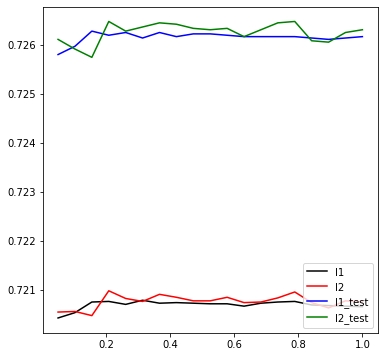

In [49]:
graph = [l1_adr,l2_adr,l1_adr_test,l2_adr_test]  
label = ["l1","l2","l1_test","l2_test"]
colors = ["black","red","blue","green"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color=colors[i],label=label[i])
plt.legend(loc=4)#图例的位置在哪里?4表示，右下角
plt.show()

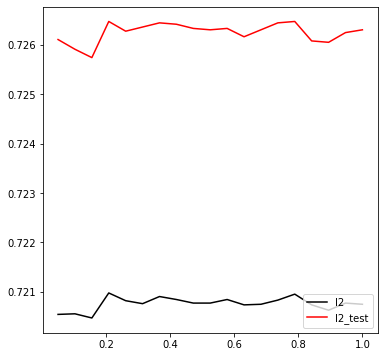

In [52]:
#由于l1表现较差，故不选用，观察l2表现
graph = [l2_adr,l2_adr_test]  
label = ["l2","l2_test"]
colors = ["black","red"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color=colors[i],label=label[i])
plt.legend(loc=4)#图例的位置在哪里?4表示，右下角
plt.show()

In [50]:
#用逻辑回归模型，标签为是否是高消费
#使用较差验证查看LR模型表现
from sklearn.feature_selection import SelectFromModel

LR_ = LR(solver="liblinear",C=1,random_state=0)
cross_val_score(LR_,X,y_adr,cv=10).mean()

0.6579951130122507

In [51]:
LR_ = LR_.fit(X,y_adr)
[*zip(X.columns,LR_.coef_.ravel())]

[('is_canceled', 0.27119649209812297),
 ('arrival_date_year', 0.845320840751667),
 ('arrival_date_month', -0.016351416902357214),
 ('arrival_date_week_number', 0.04339995159372692),
 ('arrival_date_day_of_month', 0.0019241835278939008),
 ('stays_in_weekend_nights', -0.05881554617367866),
 ('stays_in_week_nights', 0.03639585127577077),
 ('adults', 0.6026550974711276),
 ('meal', 0.05180498325486642),
 ('country', 0.00025729770379413286),
 ('market_segment', 0.42204177734372506),
 ('distribution_channel', -0.41292055407327666),
 ('previous_cancellations', -0.029402804947481143),
 ('previous_bookings_not_canceled', -0.15481419986698508),
 ('reserved_room_type', 0.41929264114100456),
 ('assigned_room_type', -0.037236776949151854),
 ('booking_changes', 0.063666614938502),
 ('agent', 0.00090253409058232),
 ('days_in_waiting_list', -0.0007501701824727599),
 ('customer_type', -0.026324135136718257),
 ('total_of_special_requests', 0.20881133118395462),
 ('is_City_Hotel', -1.195931453310381),
 ('

## 分析

可以看出，相关性较强的是特征'adults'可能成人较多时，会预定较贵的房间
之后'reserved_room_type'和高消费相关性也较强，预定的房间规格和房间消费的确是强关联